# 02-demographics-and-clinical-characteristics.ipynb

Using `ibs-brain` conda environment

Arvid Lundervold

Updated: 2025-02-01; 2025-02-01


Reporting demographics and clinical characteristics of the IBS-Brain cohort `demographics_fs7_rbans_78x48.csv`

Saving to `latex/tables/demographic_characteristics_table.tex`


In [1]:
import os
import platform
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

home = os.path.expanduser('~')
%matplotlib inline

In [2]:
if platform.system() == 'Darwin':
    print(f'OK, you are running on MacOS ({platform.version()})')
if platform.system() == 'Linux':
    print(f'OK, you are running on Linux ({platform.version()})')
if platform.system() == 'Windows':
    print(f'OK, but consider to install WSL for Windows10/11 since you are running on {platform.system()}')
    print('Check https://docs.microsoft.com/en-us/windows/wsl/install')

OK, you are running on MacOS (Darwin Kernel Version 24.3.0: Thu Jan  2 20:22:00 PST 2025; root:xnu-11215.81.4~3/RELEASE_X86_64)


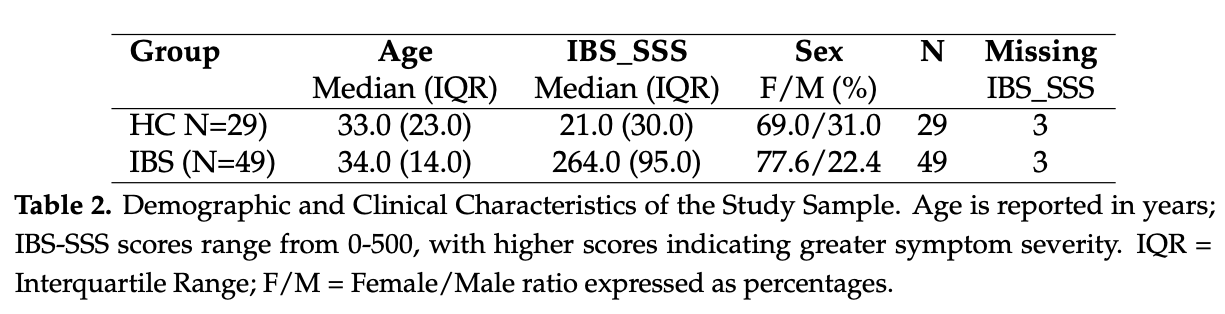

In [3]:
curr_dir = f"{os.path.expanduser('~')}/GitHub/ibs-brain/notebooks"
os.chdir(curr_dir)

from IPython.display import Image, display
display(Image(filename='../assets/Tab2.png', width=800))

### Read data with information about demographics, brain morphometry and RBANS for 78 participants

In [4]:
df = pd.read_csv('../data/demographics_fs7_rbans_78x48.csv')

In [5]:
df

,Subject,Group,eTIV,Left-Cerebellum-White-Matter,Left-Cerebellum-Cortex,Left-Thalamus,Left-Caudate,Left-Putamen,Left-Pallidum,Left-Hippocampus,...,Fullscale_RBANS,Memory_Index,Visuospatial_Index,Verbalskills_Index,Attention_Index,Recall_Index,IBS_SSS,Age,Gender,Education
0,BGA_046,IBS,1.743419e+06,0.009292,0.034808,0.005048,0.002424,0.003358,0.001248,0.003099,...,100,80,102,93,97,86,195.0,38,M,12.0
1,BGA_047,IBS,1.360311e+06,0.009960,0.039399,0.005439,0.002127,0.002992,0.001318,0.002999,...,116,109,107,97,115,126,325.0,19,F,13.0
2,BGA_048,IBS,1.350452e+06,0.011099,0.037770,0.005755,0.002750,0.004094,0.001498,0.003533,...,95,83,84,113,103,100,326.0,34,F,13.0
3,BGA_050,IBS,1.595000e+06,0.010458,0.030902,0.005803,0.002675,0.003622,0.001322,0.002925,...,87,86,97,90,98,86,357.0,44,F,18.0
4,BGA_051,IBS,1.645577e+06,0.010128,0.034373,0.005717,0.002209,0.003332,0.001317,0.002864,...,100,105,90,97,108,100,293.0,38,M,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,BGA_166,HC,1.399586e+06,0.011516,0.034967,0.005952,0.002364,0.003272,0.001358,0.002845,...,93,89,90,118,108,82,56.0,19,F,NaN
74,BGA_167,HC,1.394849e+06,0.011416,0.031906,0.005171,0.002180,0.003092,0.001154,0.002759,...,97,83,85,116,113,23,25.0,52,F,NaN
75,BGA_168,HC,1.259360e+06,0.012970,0.041197,0.006277,0.003057,0.004054,0.001500,0.003182,...,100,100,103,107,86,104,21.0,50,F,NaN
76,BGA_171,HC,1.609011e+06,0.010545,0.040919,0.005930,0.002501,0.003863,0.001624,0.002967,...,96,89,102,85,101,110,32.0,21,M,NaN


### Age and gender/sex distribution and morphometric differences

In [6]:
print('Age distribution:')
df.groupby(['Gender', 'Group']).Age.describe().round(3)

Age distribution:


count    mean     std   min   25%   50%    75%   max
Gender Group                                                      
F      HC      20.0  36.900  13.630  19.0  23.0  37.5  49.25  58.0
       IBS     38.0  34.947  11.109  19.0  26.5  33.0  41.75  61.0
M      HC       9.0  31.444  12.177  21.0  22.0  26.0  38.00  58.0
       IBS     11.0  37.364   6.932  28.0  32.0  38.0  42.50  48.0

In [7]:
# Make a cross tabulation of Gender and Group with marginals
pd.crosstab(df['Gender'], df['Group'], margins=True)

Group,HC,IBS,All
Gender,,,
F,20,38,58
M,9,11,20
All,29,49,78


In [8]:
# Function to calculate summary statistics
def create_summary_table(df):
    # Initialize the summary dictionary
    summary_dict = {}
    
    for group in df['Group'].unique():
        group_data = df[df['Group'] == group]
        
        # Calculate statistics
        age_median = group_data['Age'].median()
        age_iqr = group_data['Age'].quantile(0.75) - group_data['Age'].quantile(0.25)
        
        ibs_median = group_data['IBS_SSS'].median()
        ibs_iqr = group_data['IBS_SSS'].quantile(0.75) - group_data['IBS_SSS'].quantile(0.25)
        
        f_percent = (group_data['Gender'] == 'F').mean() * 100
        m_percent = (group_data['Gender'] == 'M').mean() * 100
        
        n = len(group_data)
        missing = group_data['IBS_SSS'].isna().sum()
        
        summary_dict[group] = {
            'Age\nMedian (IQR)': f"{age_median:.1f} ({age_iqr:.1f})",
            'IBS_SSS\nMedian (IQR)': f"{ibs_median:.1f} ({ibs_iqr:.1f})",
            'Sex\nF/M (%)': f"{f_percent:.1f}/{m_percent:.1f}",
            'N': n,
            'Missing\nIBS_SSS': missing
        }
    
    # Convert to DataFrame
    summary_df = pd.DataFrame(summary_dict).T
    
    return summary_df



In [9]:
# Create and display the summary table
summary_table = create_summary_table(df)
print(summary_table)

    Age\nMedian (IQR) IBS_SSS\nMedian (IQR) Sex\nF/M (%)   N Missing\nIBS_SSS
IBS       34.0 (14.0)          264.0 (95.0)    77.6/22.4  49                3
HC        33.0 (23.0)           21.0 (30.0)    69.0/31.0  29                3


In [10]:
def df_to_latex_table(summary_df):
    # Store the backslash for LaTeX
    bs = "\\"
    
    # Start of LaTeX table
    latex_code = [
        f"{bs}begin{{table}}[htb]",
        f"{bs}centering",
        f"{bs}begin{{tabular}}{{lccccc}}",
        f"{bs}hline",
        f"Group & Age & IBS\\_SSS & Sex & N & Missing {bs}{bs}",
        f"& Median (IQR) & Median (IQR) & F/M ({bs}%) & & IBS\\_SSS {bs}{bs}",
        f"{bs}hline"
    ]
    
    # Sort the DataFrame to ensure HC is above IBS
    sorted_df = summary_df.sort_index()
    
    # Get the actual column names from DataFrame
    age_col = [col for col in summary_df.columns if 'Age' in col][0]
    ibs_col = [col for col in summary_df.columns if 'IBS_SSS' in col and 'Missing' not in col][0]
    sex_col = [col for col in summary_df.columns if 'Sex' in col][0]
    n_col = 'N'
    missing_col = [col for col in summary_df.columns if 'Missing' in col][0]
    
    # Convert each row to LaTeX format
    for idx, row in sorted_df.iterrows():
        # Format the group name with N
        group_n = f"{idx} (N={int(row[n_col])})"
        
        # Create the row string without backslash in f-string
        row_text = (f"{group_n} & {row[age_col]} & {row[ibs_col]} & "
                   f"{row[sex_col]} & {int(row[n_col])} & {int(row[missing_col])}")
        latex_row = row_text + f" {bs}{bs}"
        latex_code.append(latex_row)
    
    # End of table
    latex_code.extend([
        f"{bs}hline",
        f"{bs}end{{tabular}}",
        f"{bs}caption{{Demographic and Clinical Characteristics of the Study Sample. Age is reported in years; IBS-SSS scores range from 0-500, with higher scores indicating greater symptom severity. IQR = Interquartile Range; F/M = Female/Male ratio expressed as percentages.}}",
        f"{bs}label{{table:demographics}}",
        f"{bs}end{{table}}"
    ])
    
    # Join all lines with newlines
    return "\n".join(latex_code)

# Create and save the LaTeX table
latex_table = df_to_latex_table(summary_table)
print("\nGenerated LaTeX code:")
print(latex_table)



Generated LaTeX code:
\begin{table}[htb]
\centering
\begin{tabular}{lccccc}
\hline
Group & Age & IBS\_SSS & Sex & N & Missing \\
& Median (IQR) & Median (IQR) & F/M (\%) & & IBS\_SSS \\
\hline
HC (N=29) & 33.0 (23.0) & 21.0 (30.0) & 69.0/31.0 & 29 & 3 \\
IBS (N=49) & 34.0 (14.0) & 264.0 (95.0) & 77.6/22.4 & 49 & 3 \\
\hline
\end{tabular}
\caption{Demographic and Clinical Characteristics of the Study Sample. Age is reported in years; IBS-SSS scores range from 0-500, with higher scores indicating greater symptom severity. IQR = Interquartile Range; F/M = Female/Male ratio expressed as percentages.}
\label{table:demographics}
\end{table}


In [11]:
def df_to_markdown_table(summary_df):
    # Store the backslash for LaTeX
    bs = "\\"
    
    # Create table without the table environment
    latex_code = [
        f"{bs}begin{{array}}{{lccccc}}",
        f"{bs}hline",
        f"\\text{{Group}} & \\text{{Age}} & \\text{{IBS\\_SSS}} & \\text{{Sex}} & N & \\text{{Missing}} {bs}{bs}",
        f"& \\text{{Median (IQR)}} & \\text{{Median (IQR)}} & \\text{{F/M (\\%)}} & & \\text{{IBS\\_SSS}} {bs}{bs}",
        f"{bs}hline"
    ]
    
    # Sort the DataFrame to ensure HC is above IBS
    sorted_df = summary_df.sort_index()
    
    # Get the actual column names from DataFrame
    age_col = [col for col in summary_df.columns if 'Age' in col][0]
    ibs_col = [col for col in summary_df.columns if 'IBS_SSS' in col and 'Missing' not in col][0]
    sex_col = [col for col in summary_df.columns if 'Sex' in col][0]
    n_col = 'N'
    missing_col = [col for col in summary_df.columns if 'Missing' in col][0]
    
    # Convert each row to LaTeX format
    for idx, row in sorted_df.iterrows():
        # Format the group name with N
        group_n = f"\\text{{{idx} (N={int(row[n_col])})}}"
        
        # Create the row string
        row_text = (f"{group_n} & {row[age_col]} & {row[ibs_col]} & "
                   f"{row[sex_col]} & {int(row[n_col])} & {int(row[missing_col])}")
        latex_row = row_text + f" {bs}{bs}"
        latex_code.append(latex_row)
    
    # End of table
    latex_code.extend([
        f"{bs}hline",
        f"{bs}end{{array}}"
    ])
    
    # Join all lines with newlines
    return "\n".join(latex_code)

# Create markdown content
markdown_content = f"""
$$
{df_to_markdown_table(summary_table)}
$$
"""

# Display in notebook
from IPython.display import Markdown
display(Markdown(markdown_content))


$$
\begin{array}{lccccc}
\hline
\text{Group} & \text{Age} & \text{IBS\_SSS} & \text{Sex} & N & \text{Missing} \\
& \text{Median (IQR)} & \text{Median (IQR)} & \text{F/M (\%)} & & \text{IBS\_SSS} \\
\hline
\text{HC (N=29)} & 33.0 (23.0) & 21.0 (30.0) & 69.0/31.0 & 29 & 3 \\
\text{IBS (N=49)} & 34.0 (14.0) & 264.0 (95.0) & 77.6/22.4 & 49 & 3 \\
\hline
\end{array}
$$


In [12]:
# Save the table
import os

project_root = f"{home}/GitHub/ibs-brain"
tables_dir = os.path.join(project_root, "latex", "tables")
os.makedirs(tables_dir, exist_ok=True)

table_path = os.path.join(tables_dir, "demographic_characteristics_table.tex")
with open(table_path, 'w') as f:
    f.write(latex_table)

print(f"\nTable saved to: {table_path}")


Table saved to: /Users/arvid/GitHub/ibs-brain/latex/tables/demographic_characteristics_table.tex


In [13]:
# Calculate statistics for IBS-SSS scores in HC group
hc_data = df[df['Group'] == 'HC']
n_hc = len(hc_data)

# Count participants in each severity level
lowest_level = len(hc_data[hc_data['IBS_SSS'] < 75])
mild_level = len(hc_data[(hc_data['IBS_SSS'] >= 75) & (hc_data['IBS_SSS'] < 175)])

# Calculate percentages
pct_lowest = (lowest_level / n_hc) * 100
pct_mild = (mild_level / n_hc) * 100

# Calculate descriptive statistics
median_score = hc_data['IBS_SSS'].median()
q1_score = hc_data['IBS_SSS'].quantile(0.25)
q3_score = hc_data['IBS_SSS'].quantile(0.75)
max_score = hc_data['IBS_SSS'].max()

print(f"Of the {n_hc} HC participants, {lowest_level} ({pct_lowest:.1f}%) obtained an IBS-SSS score below 75 (lowest level), "
      f"\nwhile {mild_level} ({pct_mild:.1f}%) reported scores between 75 and 175 (mild level). "
      f"\nThe median IBS-SSS score for the HC group was {median_score:.1f} "
      f"(IQR: {q1_score:.1f}-{q3_score:.1f}), with a maximum score of {max_score:.1f} in this group.")


Of the 29 HC participants, 26 (89.7%) obtained an IBS-SSS score below 75 (lowest level), 
while 0 (0.0%) reported scores between 75 and 175 (mild level). 
The median IBS-SSS score for the HC group was 21.0 (IQR: 9.8-39.8), with a maximum score of 69.0 in this group.


In [15]:
49/(49+29)

0.6282051282051282

### Material and subjects

In [52]:
# BG_MRI_exam_pr_20220927.txt
list_mri = [
'BGA_046_20190531_0825',
'BGA_046_20190531_1132',
'BGA_046_20191115_0742',
'BGA_046_20191115_1117',
'BGA_047_20190531_0925',
'BGA_047_20190531_1222',
'BGA_048_20190531_1014',
'BGA_048_20190531_1305',
'BGA_048_20191115_0931',
'BGA_048_20191115_1257',
'BGA_050_20190614_0824',
'BGA_050_20190614_1106',
'BGA_051_20190614_1019',
'BGA_051_20190614_1307',
'BGA_051_20191115_0833',
'BGA_051_20191115_1208',
'BGA_053_20190614_0920',
'BGA_053_20190614_1203',
'BGA_055_20190823_0848',
'BGA_055_20190823_1231',
'BGA_056_20190823_0939',
'BGA_056_20190823_1322',
'BGA_057_20190823_1040',
'BGA_057_20190823_1408',
'BGA_058_20190906_0935',
'BGA_058_20190906_1204',
'BGA_058_20191213_0828',
'BGA_058_20191213_1155',
'BGA_059_20190906_0737',
'BGA_059_20190906_1024',
'BGA_060_20190906_0843',
'BGA_060_20190906_1110',
'BGA_060_20200110_0743',
'BGA_060_20200110_1047',
'BGA_061_20190920_0835',
'BGA_062_20190920_0923',
'BGA_062_20190920_1120',
'BGA_064_20190823_0752',
'BGA_064_20190823_1142',
'BGA_065_20200110_0913',
'BGA_065_20200110_1139',
'BGA_066_20191018_1051',
'BGA_066_20191018_1410',
'BGA_067_20191101_0935',
'BGA_067_20191101_1255',
'BGA_068_20191004_0939',
'BGA_068_20191004_1218',
'BGA_068_20200124_0736',
'BGA_068_20200124_1059',
'BGA_069_20190920_0746',
'BGA_069_20190920_1249',
'BGA_070_20190920_1018',
'BGA_070_20190920_1334',
'BGA_072_20191018_0846',
'BGA_072_20191018_1221',
'BGA_073_20191004_0837',
'BGA_073_20191004_1129',
'BGA_074_20191018_0947',
'BGA_074_20191018_1309',
'BGA_076_20191004_1041',
'BGA_076_20191004_1304',
'BGA_077_20191101_0743',
'BGA_077_20191101_1116',
'BGA_077_20200403_0938',
'BGA_077_20200403_1207',
'BGA_078_20191101_0849',
'BGA_078_20191101_1201',
'BGA_078_20200417_0929',
'BGA_078_20200417_1211',
'BGA_079_20191018_0755',
'BGA_079_20191018_1136',
'BGA_081_20191101_1032',
'BGA_081_20191101_1354',
'BGA_082_20200124_1007',
'BGA_082_20200124_1327',
'BGA_083_20191129_0922',
'BGA_083_20191129_1148',
'BGA_083_20200515_0825',
'BGA_083_20200515_1036',
'BGA_084_20191115_1033',
'BGA_084_20191115_1347',
'BGA_085_20191129_0743',
'BGA_085_20191129_1102',
'BGA_085_20200417_1026',
'BGA_085_20200417_1305',
'BGA_086_20191129_0834',
'BGA_086_20191129_1238',
'BGA_088_20200207_1015',
'BGA_088_20200207_1328',
'BGA_089_20200207_0741',
'BGA_089_20200207_1101',
'BGA_090_20191129_1013',
'BGA_090_20191129_1322',
'BGA_091_20191213_1011',
'BGA_091_20191213_1339',
'BGA_092_20191213_0740',
'BGA_092_20191213_1100',
'BGA_093_20191213_0914',
'BGA_093_20191213_1245',
'BGA_094_20200207_0926',
'BGA_094_20200207_1238',
'BGA_095_20200124_0824',
'BGA_095_20200124_1146',
'BGA_095_20200417_1118',
'BGA_096_20200110_1000',
'BGA_096_20200110_1243',
'BGA_097_20200221_0936',
'BGA_097_20200221_1207',
'BGA_099_20200124_0917',
'BGA_099_20200124_1241',
'BGA_100_20200306_0830',
'BGA_100_20200306_1143',
'BGA_101_20200207_0836',
'BGA_101_20200207_1151',
'BGA_104_20210226_0948',
'BGA_104_20210226_1215',
'BGA_107_20200221_0839',
'BGA_107_20200221_1116',
'BGA_107_20200515_0920',
'BGA_107_20200515_1123',
'BGA_110_20200221_0750',
'BGA_110_20200221_1026',
'BGA_114_20200306_0919',
'BGA_114_20200306_1229',
'BGA_115_20200306_0738',
'BGA_115_20200306_1055',
'BGA_118_20200306_1007',
'BGA_118_20200306_1319',
'BGA_119_20201113_1022',
'BGA_128_20210521_0747',
'BGA_128_20210521_1023',
'BGA_130_20210226_1037',
'BGA_130_20210226_1304',
'BGA_131_20210618_0739',
'BGA_131_20210618_0935',
'BGA_138_20210521_0839',
'BGA_138_20210521_1113',
'BGA_139_20210521_0928',
'BGA_139_20210521_1203',
'BGA_141_20210604_0736',
'BGA_141_20210604_1108',
'BGA_142_20210226_0859',
'BGA_142_20210226_1126',
'BGA_142_20210604_0823',
'BGA_142_20210604_1244',
'BGA_143_20210423_0742',
'BGA_143_20210423_1058',
'BGA_144_20210409_0742',
'BGA_144_20210409_1112',
'BGA_144_20210702_0828',
'BGA_144_20210702_1138',
'BGA_145_20210312_0927',
'BGA_145_20210312_1154',
'BGA_145_20210702_1003',
'BGA_145_20210702_1313',
'BGA_146_20210312_1017',
'BGA_147_20210312_0826',
'BGA_147_20210312_1106',
'BGA_149_20210507_0753',
'BGA_149_20210507_1115',
'BGA_151_20210324_0750',
'BGA_151_20210324_0957',
'BGA_152_20210423_1009',
'BGA_152_20210423_1236',
'BGA_153_20210409_0834',
'BGA_153_20210409_1203',
'BGA_154_20210409_1018',
'BGA_154_20210409_1253',
'BGA_154_20210813_0828',
'BGA_154_20210813_1115',
'BGA_156_20210507_0935',
'BGA_156_20210507_1251',
'BGA_156_20210813_0915',
'BGA_156_20210813_1204',
'BGA_157_20210507_1027',
'BGA_157_20210507_1340',
'BGA_159_20210507_0844',
'BGA_159_20210507_1204',
'BGA_159_20210813_0739',
'BGA_159_20210813_1023',
'BGA_160_20210423_0920',
'BGA_160_20210423_1146',
'BGA_161_20210604_1018',
'BGA_161_20210604_1333',
'BGA_164_20210604_0914',
'BGA_164_20210604_1156',
'BGA_165_20210730_0826',
'BGA_165_20210730_1107',
'BGA_166_20210716_0927',
'BGA_166_20210716_1149',
'BGA_167_20210730_0915',
'BGA_167_20210730_1153',
'BGA_168_20210716_0837',
'BGA_168_20210716_1101',
'BGA_169_20210716_0732',
'BGA_169_20210716_1014',
'BGA_171_20210702_0916',
'BGA_171_20210702_1225',
'BGA_172_20210702_0740',
'BGA_172_20210702_1050',
'BGA_173_20210730_1005',
'BGA_173_20210730_1241',
]


In [53]:
# Make a list of the first 7 characters of each entry in list_mri
list_mri_subjects  = sorted(list(set([entry[:7] for entry in list_mri])))  # Remove duplicates and sort
print(f"Length of list_mri_subjects: {len(list_mri_subjects)}")


Length of list_mri_subjects: 85


In [78]:
# Subjects in list_mri that are not in df['Subject']
# where candidates in list_mri are the the ones with the first 7 characteres in an entry 


list_mri_not_in_df = sorted(list(set([mri[:7] for mri in list_mri if mri[:6] not in df['Subject']])))
# Extract first 7 characters from list_mri entries
list_mri_candidates = [entry[:7] for entry in list_mri]

# Extract first 7 characters from df['Subject']
df_subjects = df['Subject'].str[:7].unique()

# Find candidates in list_mri that are not in df
missing_candidates = set(list_mri_subjects) - set(df_subjects)

missing_mri_subjects = sorted(list(set(list_mri_subjects) - set(df_subjects)))

print(f'Length of list_mri_subjects   : {len(set(list_mri_subjects))}')
print(f'Length of df_subjects          : {len(set(df_subjects))}')
print(f"Found {len(missing_candidates)} candidates in list_mri that are not in df['Subject']:")
missing_mri_subjects

Length of list_mri_subjects   : 85
Length of df_subjects          : 78
Found 7 candidates in list_mri that are not in df['Subject']:


['BGA_061', 'BGA_073', 'BGA_118', 'BGA_119', 'BGA_146', 'BGA_169', 'BGA_173']

_MRI but excuded from the study:_

>    'BGA_061', F, IBS, fullscale-iq similar to BGA_146<br>
>    'BGA_073', No RBANS<br>
>    'BGA_118', No RBANS<br>
>    'BGA_119', F, non-Norwegian<br>
>    'BGA_146', M, HC, iq fullscale-iq similar to BGA_169<br> 
>    'BGA_169', No RBANS<br>
    'BGA_173', No RBANS

In [57]:
# Print all entries in list_mri that start with any of the missing candidates
print("Full entries in list_mri for missing candidates:")
for candidate in sorted(missing_candidates):
    matching_entries = [entry for entry in list_mri if entry.startswith(candidate)]
    if matching_entries:  # Only print if there are matching entries
        print(f"\nSubject {candidate}:")
        for entry in sorted(matching_entries):
            print(f"  {entry}")




Full entries in list_mri for missing candidates:

Subject BGA_061:
  BGA_061_20190920_0835

Subject BGA_073:
  BGA_073_20191004_0837
  BGA_073_20191004_1129

Subject BGA_118:
  BGA_118_20200306_1007
  BGA_118_20200306_1319

Subject BGA_119:
  BGA_119_20201113_1022

Subject BGA_146:
  BGA_146_20210312_1017

Subject BGA_169:
  BGA_169_20210716_0732
  BGA_169_20210716_1014

Subject BGA_173:
  BGA_173_20210730_1005
  BGA_173_20210730_1241


In [73]:
# Find all entries in list_mri for which subjects are in df['Subject']

for subject in df['Subject']:
    entries = [entry for entry in list_mri if entry[:7] == subject]
    print(f"{subject}: {entries}")


BGA_046: ['BGA_046_20190531_0825', 'BGA_046_20190531_1132', 'BGA_046_20191115_0742', 'BGA_046_20191115_1117']
BGA_047: ['BGA_047_20190531_0925', 'BGA_047_20190531_1222']
BGA_048: ['BGA_048_20190531_1014', 'BGA_048_20190531_1305', 'BGA_048_20191115_0931', 'BGA_048_20191115_1257']
BGA_050: ['BGA_050_20190614_0824', 'BGA_050_20190614_1106']
BGA_051: ['BGA_051_20190614_1019', 'BGA_051_20190614_1307', 'BGA_051_20191115_0833', 'BGA_051_20191115_1208']
BGA_053: ['BGA_053_20190614_0920', 'BGA_053_20190614_1203']
BGA_055: ['BGA_055_20190823_0848', 'BGA_055_20190823_1231']
BGA_056: ['BGA_056_20190823_0939', 'BGA_056_20190823_1322']
BGA_057: ['BGA_057_20190823_1040', 'BGA_057_20190823_1408']
BGA_058: ['BGA_058_20190906_0935', 'BGA_058_20190906_1204', 'BGA_058_20191213_0828', 'BGA_058_20191213_1155']
BGA_059: ['BGA_059_20190906_0737', 'BGA_059_20190906_1024']
BGA_060: ['BGA_060_20190906_0843', 'BGA_060_20190906_1110', 'BGA_060_20200110_0743', 'BGA_060_20200110_1047']
BGA_062: ['BGA_062_20190920_09

In [58]:
# Derived from RBANS_short.sav (7 March 2023) / read_sav.ipynb

# Define list with duplicate entry (BGA_149)
list_rbans = ['BGA_046', 'BGA_047', 'BGA_048', 'BGA_049', 'BGA_050', 
              'BGA_051', 'BGA_053', 'BGA_054', 'BGA_056', 'BGA_057', 
              'BGA_058', 'BGA_060', 'BGA_061', 'BGA_063', 'BGA_064', 
              'BGA_065', 'BGA_066', 'BGA_067', 'BGA_068', 'BGA_069', 
              'BGA_070', 'BGA_071', 'BGA_072', 'BGA_074', 'BGA_075', 
              'BGA_076', 'BGA_077', 'BGA_078', 'BGA_079', 'BGA_081', 
              'BGA_082', 'BGA_083', 'BGA_084', 'BGA_085', 'BGA_086', 
              'BGA_088', 'BGA_089', 'BGA_090', 'BGA_091', 'BGA_092', 
              'BGA_093', 'BGA_094', 'BGA_095', 'BGA_096', 'BGA_097', 
              'BGA_099', 'BGA_100', 'BGA_101', 'BGA_104', 'BGA_106', 
              'BGA_107', 'BGA_110', 'BGA_112', 'BGA_113', 'BGA_114', 
              'BGA_115', 'BGA_116', 'BGA_119', 'BGA_120', 'BGA_122', 
              'BGA_123', 'BGA_125', 'BGA_128', 'BGA_130', 'BGA_131', 
              'BGA_132', 'BGA_134', 'BGA_135', 'BGA_136', 'BGA_137', 
              'BGA_138', 'BGA_139', 'BGA_141', 'BGA_142', 'BGA_143', 
              'BGA_144', 'BGA_145', 'BGA_146', 'BGA_147', 'BGA_148', 
              'BGA_149', 'BGA_149', 'BGA_150', 'BGA_152', 'BGA_153', 
              'BGA_154', 'BGA_156', 'BGA_157', 'BGA_158', 'BGA_159', 
              'BGA_160', 'BGA_161', 'BGA_162', 'BGA_164', 'BGA_171', 
              'BGA_172']

# Print count of unique entries in list_rbans
print(f"\nTotal unique entries in list_rbans: {len(set(list_rbans))}")
print(f"Total entries in list_rbans (including duplicates): {len(list_rbans)}")



Total unique entries in list_rbans: 95
Total entries in list_rbans (including duplicates): 96


In [59]:
# Find candidates in list_rbans that are not in df
missing_candidates = set(list_rbans) - set(df['Subject'])

print(f"Found {len(missing_candidates)} subejcts in list_rbans that are not in df['Subject']:")
for candidate in sorted(missing_candidates):
    print(candidate)

Found 25 subejcts in list_rbans that are not in df['Subject']:
BGA_049
BGA_054
BGA_061
BGA_063
BGA_071
BGA_075
BGA_106
BGA_112
BGA_113
BGA_116
BGA_119
BGA_120
BGA_122
BGA_123
BGA_125
BGA_132
BGA_134
BGA_135
BGA_136
BGA_137
BGA_146
BGA_148
BGA_150
BGA_158
BGA_162
